Loading the libraries

In [121]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

import numpy as np

Loading the file from csv file

In [10]:
df = pd.read_csv(r'C:\Users\kyush\Desktop/Reviews.csv')

In [11]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [13]:
df.rows

AttributeError: 'DataFrame' object has no attribute 'rows'

In [16]:
df['Helpful %']=np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [18]:
df['Helpful %'].unique()  #display all  the unique value in helpful features

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [19]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [20]:
df.head() #new column is added which is %upvote

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [21]:
df.groupby(['Score','%upvote']).agg('count') 

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

In [23]:
df.groupby(['Score','%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [24]:
df_s=df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

In [27]:
pivot = df_s.pivot(index='%upvote',columns='Score')

In [28]:
print(pivot)

            Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='None-Score', ylabel='%upvote'>

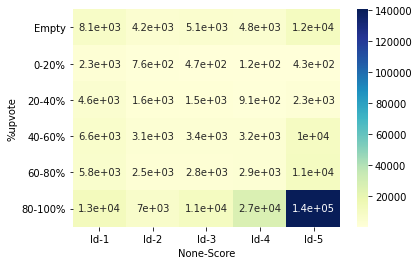

In [30]:
sns.heatmap(pivot,annot=True,cmap='YlGnBu') # cmap color map

In [31]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [32]:
df2= df[df['Score']!=3]

In [125]:
X=df2['Text']

In [126]:
df2['Score'].unique()

array([5, 1, 4, 2], dtype=int64)

In [127]:
y_dict={1:0,2:0,4:1,5:1}
y=df2['Score'].map(y_dict)

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
c=CountVectorizer(stop_words='english')

In [130]:
X_c=c.fit_transform(x)

In [131]:
X_c.shape

(525814, 114969)

In [40]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X_c,y)

In [133]:
x_train.shape


(394360, 114969)

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
log=LogisticRegression()

In [134]:
ml = log.fit(X_train,y_train)

In [135]:
ml.score(X_test,y_test)

0.9357341731708431

In [49]:
w=c.get_feature_names()

In [50]:
coef=ml.coef_.tolist()[0]
coef

[-0.27707649095063014,
 0.4057497945827007,
 0.39377871907543827,
 -0.008967418686342071,
 -0.008941709050269725,
 -0.011526580036809694,
 0.0003353358618289048,
 -0.007199503053388796,
 0.00044981002292056213,
 0.00034626262565901484,
 0.0013730306779922302,
 -0.010104842013716406,
 0.0009799058718126838,
 0.013637425564412553,
 -0.3664522317957168,
 0.0012273582060235832,
 0.002547236671030723,
 0.003195201152226108,
 0.0007514024052283583,
 5.531482436332921e-05,
 0.10245109073487618,
 0.027799163022720168,
 0.02425823968947028,
 0.02425823968947028,
 0.02425823968947028,
 0.02425823968947028,
 0.02425823968947028,
 0.02425823968947028,
 0.02425823968947028,
 0.02425823968947028,
 0.02425823968947028,
 0.0,
 0.042094068197481696,
 0.0,
 -0.08759383260775551,
 -0.000459524412002476,
 0.0001468581685832275,
 0.0,
 0.0,
 2.0729805209638418e-05,
 -0.11032852980032794,
 0.01017047134204624,
 9.337306035597883e-05,
 0.004715252619839651,
 -0.05076915201449892,
 0.0,
 0.011132730239696778,

In [53]:
coef_df=pd.DataFrame({'Word':w,'Coefficient':coef})
coef_df

,Word,Coefficient
0,00,-0.277076
1,000,0.405750
2,0000,0.393779
3,000001,-0.008967
4,00001,-0.008942
...,...,...
114964,çaykur,0.000000
114965,çelem,0.000000
114966,être,0.017084
114967,île,0.000000


In [55]:
coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=False)

In [56]:
coef_df.head(20)

,Word,Coefficient
80600,pleasantly,3.948757
39072,downside,2.870743
5865,addicting,2.843538
55029,hooked,2.808921
94667,skeptical,2.568446
102857,terrific,2.380158
35691,delighted,2.294217
40342,economical,2.149401
96353,soothing,2.097372
39214,drawback,2.083860


In [57]:
coef_df.tail(20)

,Word,Coefficient
73374,nope,-2.152104
110404,vomited,-2.172510
46083,flavorless,-2.176631
102845,terrible,-2.189561
108644,useless,-2.204876
76576,overpowers,-2.296446
37563,disappointment,-2.331018
35220,defeats,-2.380655
37528,disapointed,-2.404203
88351,returnable,-2.409551


In [136]:
def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
c=CountVectorizer(stop_words='english')

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
text_fit(X,y,c,LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9370654373392974


-Top 20 positive-
      Word  Coefficient
pleasantly     3.685965
  downside     3.554426
 addicting     2.927256
 skeptical     2.804842
  drawback     2.686186
   worries     2.653896
  thankful     2.362524
       met     2.358012
   easiest     2.356774
economical     2.332316
    hooked     2.292434
    delish     2.239039
    resist     2.213076
  terrific     2.208973
   trainer     2.063533
      whim     2.023772
  soothing     2.005197
   kernals     2.002156
   welcome     1.998021
    bertie     1.965901


-Top 20 negative-
          Word  Coefficient
 dissapointing    -2.327160
       vomited    -2.344796
           ick    -2.446801
      mediocre    -2.450075
    returnable    -2.510121
         ruins    -2.551256
disappointment    -2.572351
    overpowers    -2.573837
       defeats    -2.663466
   disapointed    -2.663984
        lacked    -2.716183
        ripoff    -2.74

In [141]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)
        

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [143]:
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 14942   2812]
 [  5620 108080]]
0.9358558887519589


In [144]:
from sklearn.dummy import DummyClassifier


In [145]:
c=CountVectorizer()

In [146]:
text_fit(X,y,c,DummyClassifier(),0)

features: 115282
 train records: 394360
 test records: 131454
Model Accuracy: 0.8441736272764617


In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
tfidf=TfidfVectorizer(stop_words='english')
lr=LogisticRegression()

In [149]:
text_fit(X,y,tfidf,lr,0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9348365207601138


In [150]:
predict(x,y,c,lr)

features: 115282
 train records: 394360
 test records: 131454
[[ 14922   2773]
 [  5421 108338]]
0.9376664080210568


In [83]:
data=df[df['Score']==5]

In [85]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%


In [86]:
data['%upvote'].unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [89]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [151]:
X=data2['Text']
data2['%upvote'].unique()

['80-100%', '60-80%', '20-40%', '0-20%']
Categories (4, object): ['0-20%' < '20-40%' < '60-80%' < '80-100%']

In [156]:
y_dict={'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}
y=data2['%upvote'].map(y_dict)

In [157]:
y.value_counts()

1.0    151721
0.0      2707
Name: %upvote, dtype: int64

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [159]:
tf=TfidfVectorizer()
X_c=tf.fit_transform(X)

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)


In [161]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

In [162]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [163]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [164]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))


Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
log_class=LogisticRegression()

In [167]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
import numpy as np
from sklearn.model_selection import GridSearchCV

In [168]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [169]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  866     0]
 [  643 44820]]
0.9861210041226878
